## Observations and Insights 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import math

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how="outer")
# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.
unique_mice = merge_df["Mouse ID"].nunique()
unique_mice

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
unique_merge_df = merge_df.drop_duplicates(["Mouse ID", "Timepoint"])
unique_merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
r_df = merge_df.merge(unique_merge_df, how='outer', indicator=True).loc[lambda x: x['_merge']=='left_only']
r_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,_merge
911,g989,Propriva,Female,21,26,5,47.570392,0,left_only
913,g989,Propriva,Female,21,26,10,49.880528,0,left_only
915,g989,Propriva,Female,21,26,15,53.442020,0,left_only
917,g989,Propriva,Female,21,26,20,54.657650,1,left_only


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_id = merge_df.drop_duplicates(["Mouse ID"])
clean_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [10]:
# Checking the number of mice in the clean DataFrame.
unique_clean = len(clean_id)
unique_clean


249

## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = unique_merge_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean().reset_index()
median =unique_merge_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median().reset_index()
variance =unique_merge_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var().reset_index()
standard_dev =unique_merge_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std().reset_index()
sem =unique_merge_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem().reset_index()

# This method is the most straighforward, creating multiple series and putting them all together at the end.

merge_11 = pd.merge(mean, median, on= "Drug Regimen", how="outer")
merge_1 = merge_11.rename(columns={"Tumor Volume (mm3)_x":"Mean", "Tumor Volume (mm3)_y":"Median"})
merge_22 = pd.merge(merge_1, variance, on= "Drug Regimen", how="outer")
merge_2 = merge_22.rename(columns={"Tumor Volume (mm3)":"Variance"})
merge_3 = pd.merge(merge_2, standard_dev, on= "Drug Regimen", how="outer")
summary_merge = pd.merge(merge_3, sem, on= "Drug Regimen", how="outer")
summary_merge = summary_merge.rename(columns={"Tumor Volume (mm3)_x": "St. Dev", "Tumor Volume (mm3)_y":"SEM"})
summary_merge

,Drug Regimen,Mean,Median,Variance,St. Dev,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_df = unique_merge_df.groupby(["Drug Regimen"]).agg({'Tumor Volume (mm3)':['mean', 
                                                                        'median', 
                                                                        'var', 
                                                                        'std', 
                                                                        'sem']})
regimen_df
# This method produces everything in a single groupby function


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

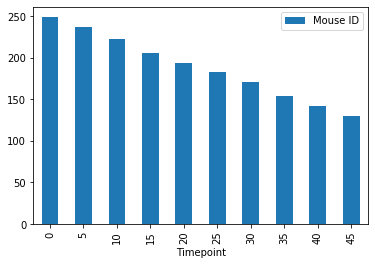

In [24]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
unique_bar = unique_merge_df.groupby(["Timepoint"], as_index=False).count()
unique_bar.plot(kind = 'bar', x="Timepoint", y = "Mouse ID")

([<matplotlib.axis.XTick at 0x211b86b6908>,
 <a list of 10 Text xticklabel objects>)

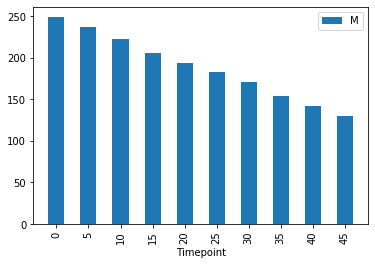

In [25]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = unique_bar['Timepoint']
y_axis = unique_bar["Mouse ID"]
plt.bar(x_axis,y_axis, width = 2.5)
plt.legend (labels="Mouse ID", loc = "upper right")
plt.xlabel("Timepoint")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, rotation='vertical')

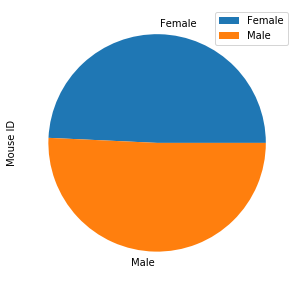

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mf = unique_merge_df.groupby(["Sex"]).count()
mf

mf_pie=mf.plot(kind = "pie", y = "Mouse ID", figsize =(5, 5))


Text(0, 0.5, 'Mouse ID')

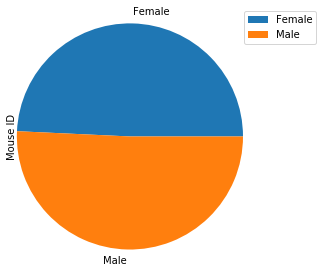

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(mf["Mouse ID"], labels = ("Female", "Male"), radius = 1.3)
plt.legend(labels = ("Female", "Male"), bbox_to_anchor =(1,1.1))
plt.ylabel("Mouse ID")

###### Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
True or True
filtered = unique_merge_df[(unique_merge_df["Drug Regimen"] == "Capomulin") |
                               (unique_merge_df["Drug Regimen"] == "Ramicane")|
                               (unique_merge_df["Drug Regimen"] == "Infubinol")|
                               (unique_merge_df["Drug Regimen"] == "Ceftamin")]

filtered_uniques=filtered["Mouse ID"].unique()
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = filtered.groupby(["Mouse ID"])["Timepoint"].max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_merge=max_timepoint.merge(filtered, on=["Mouse ID", "Timepoint"])
max_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


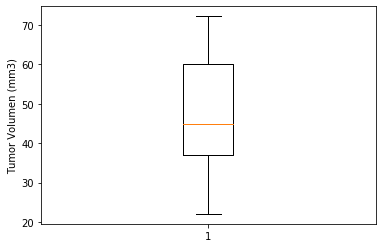

In [49]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list = []
regimens = max_merge["Drug Regimen"].unique()
regimen_list.append(regimens)

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []
tumor_vol = max_merge["Tumor Volume (mm3)"].unique()
tumor_vol.sort()
tumor_vol_list.append(tumor_vol)
tumor_vol_list

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Tumor Volumen (mm3)")
ax1.boxplot(tumor_vol_list)
plt.show()
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
